## Steps
1. Read in each NS decoding csv to a pandas dataframe<br>
2. Read in list of NS terms associated with each BD and PC as dictionary<br>
3. From (1), extract r values corresponding to each significant BD/PC using (2)<br>
4. Return the significant BM terms that are <br>
    a. Represented by NS terms with (+) correlations<br>
    b. Represented by NS terms with (-) correlations<br>
    c. Not represented by NS terms<br>
5. Return the positive NS terms that are<br>
    a. Not significant in BM<br>
    b. Significant in BM<br>
    c. Not in BM

In [162]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join
%matplotlib inline
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [2]:
rois = ['fusiform', 'paracentral', 'pcc', 'orbitofrontal', 
        'precuneus', 'temporal', 'uncus', 'visual', 'acc',
        'area_mt', 'angular', 'cerebellum', 'dlpfc', 'hypothalamus',
        'thalamus']
decoded_rois = {}
data_dir = '/Users/Katie/Dropbox/Projects/ns-v-bm-decoding/'
ns_decoding = pd.read_csv('{0}/characterized-ns-terms.csv'.format(data_dir), header=0, 
                          sep='\t', index_col=1)
ns_decoding.head()

,type
feature,
aberrant,Subject-related
abilities,Non-content
ability,Non-content
able,Non-content
abnormal,Subject-related


In [3]:
for roi in rois:
    decoded = pd.read_csv('{0}/decoded/NS-new/{1}.csv'.format(data_dir, roi), 
                          sep=',', index_col=0, usecols=[1, 2])
    ns_decoding = ns_decoding.join(decoded, rsuffix=roi)

In [31]:
ns_decoding.columns = ['type','fusiform', 'paracentral', 'pcc', 'orbitofrontal', 
        'precuneus', 'temporal', 'uncus', 'visual', 'acc',
        'mt', 'angular', 'cerebellum', 'dlpfc', 'hypothalamus',
        'thalamus']
ns_decoding.to_csv('{0}/decoded/NS-new/all.csv'.format(data_dir))

In [5]:
data_dir = '/Users/Katie/Dropbox/Projects/ns-v-bm-decoding'
neurosynth_decoding = pd.read_csv('{0}/decoded/NS/all.csv'.format(data_dir), index_col=1)

In [6]:
pos_new = pd.read_csv('{0}/decoded/NS-new/positive.csv'.format(data_dir))
top50_new = pd.read_csv('{0}/decoded/NS-new/top50.csv'.format(data_dir))

In [7]:
pos_new_long = pos_new.melt(id_vars='Type', value_name='count')
pos_new_long['criteria'] = ['all positive', 'all positive', 'all positive', 'all positive', 'all positive',
                            'all positive', 'all positive', 'all positive', 'all positive', 'all positive',
                            'all positive', 'all positive', 'all positive', 'all positive', 'all positive',
                            'all positive', 'all positive', 'all positive', 'all positive', 'all positive',
                            'all positive', 'all positive', 'all positive', 'all positive', 'all positive',
                            'all positive', 'all positive', 'all positive', 'all positive', 'all positive',
                            'all positive', 'all positive', 'all positive', 'all positive', 'all positive',
                            'all positive', 'all positive', 'all positive', 'all positive', 'all positive',
                            'all positive', 'all positive', 'all positive', 'all positive', 'all positive',
                            'all positive', 'all positive', 'all positive', 'all positive', 'all positive',
                            'all positive', 'all positive', 'all positive', 'all positive', 'all positive',
                            'all positive', 'all positive', 'all positive', 'all positive', 'all positive']
t50_new_long = top50_new.melt(id_vars='Type', value_name='count')
t50_new_long['criteria'] = ['top 50', 'top 50', 'top 50', 'top 50', 'top 50',
                            'top 50', 'top 50', 'top 50', 'top 50', 'top 50',
                            'top 50', 'top 50', 'top 50', 'top 50', 'top 50',
                            'top 50', 'top 50', 'top 50', 'top 50', 'top 50',
                            'top 50', 'top 50', 'top 50', 'top 50', 'top 50',
                            'top 50', 'top 50', 'top 50', 'top 50', 'top 50',
                            'top 50', 'top 50', 'top 50', 'top 50', 'top 50',
                            'top 50', 'top 50', 'top 50', 'top 50', 'top 50',
                            'top 50', 'top 50', 'top 50', 'top 50', 'top 50',
                            'top 50', 'top 50', 'top 50', 'top 50', 'top 50',
                            'top 50', 'top 50', 'top 50', 'top 50', 'top 50',
                            'top 50', 'top 50', 'top 50', 'top 50', 'top 50']

In [112]:
new_long = pos_new_long.append(t50_new_long)
old = pd.read_csv('/Users/Katie/Dropbox/Projects/ns-v-bm-decoding/decoded/NS/old-long-pos-50.csv', sep=',', header=0)
old_long = old.melt(id_vars=['roi','criteria'], value_name='count')
old_long = old_long[:120]

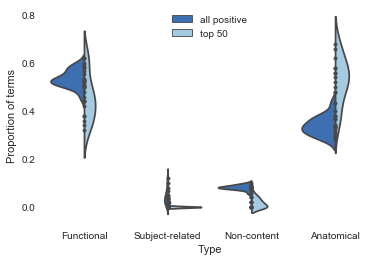

In [175]:
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)
fiu2 = sns.crayon_palette(['Denim', 'Cornflower'])

ax = sns.violinplot(x="Type", y="count", hue="criteria", data=new_long, palette=fiu2, inner="point", split=True)
ax.set_ylabel("Proportion of terms")
ax.legend(loc="upper center")

f.savefig(join(data_dir, 'presentations', 'new_ns_terms.png'), dpi=300)

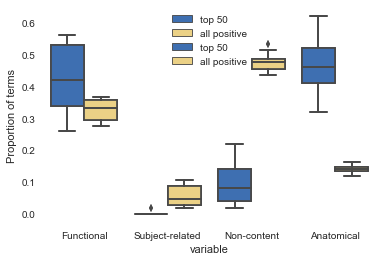

In [111]:
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)
fiu = sns.crayon_palette(['Denim', 'Goldenrod'])

ax = sns.boxplot("variable", "count", "criteria", data=old_long, palette=fiu)
ax = sns.boxplot("variable", "count", "criteria", data=old_long, palette=fiu)
ax.set_ylabel("Proportion of terms")
ax.legend(loc="upper center")

f.savefig(join(data_dir, 'presentations', 'old_ns_terms.png'), dpi=300)

In [125]:
neurosynth_decoding = pd.read_csv('{0}/decoded/NS/all.csv'.format(data_dir), header=0, index_col=1, sep=',')
neurosynth_decoding.head()

,type,fusiform,orbitofrontal,paracentral,pcc,precuneus,temporal,uncus,visual,acc,thalamus,mt,hypothalamus,angular,dlpfc,cerebellum
feature,,,,,,,,,,,,,,,,
1,Non-content,-0.1550,-0.0227,0.0905,0.0406,-0.0386,-0.0663,0.0143,-0.1075,0.0517,0.0781,-0.2110,0.1178,-0.1458,-0.1112,0.1668
1,Non-content,-0.1315,-0.0711,0.0654,-0.0289,-0.1123,-0.0856,-0.0521,-0.1077,0.0464,0.0127,-0.1755,0.0054,-0.0697,-0.0815,0.0313
5,Non-content,-0.1594,-0.0584,0.0291,-0.0891,-0.2117,-0.0193,0.0673,-0.1753,0.0318,0.0215,-0.2886,0.0680,-0.2224,-0.2445,0.1712
10,Non-content,-0.2374,0.1512,0.0269,0.0770,-0.0063,0.0266,0.0071,-0.1066,0.2261,0.0533,-0.2550,0.1129,-0.0298,0.0549,-0.0935
11,Non-content,-0.1152,-0.0693,0.0224,-0.0346,-0.1396,-0.0537,0.0276,-0.1048,0.0295,-0.0362,-0.1731,0.0579,-0.1718,-0.1331,0.0606


In [ ]:
df_long = pd.read_csv('{0}/decoded/NS/all_long.csv'.format(data_dir), index_col=1)

In [22]:
pc_df = pd.read_csv('{0}/terms/pc-ns-terms.csv'.format(data_dir), sep=',', index_col=0, encoding = 'unicode_escape')

bd_df = pd.read_csv('{0}/terms/bd-ns-terms.csv'.format(data_dir), sep=',', index_col=0, encoding = 'unicode_escape')

In [32]:
#Significant BM PCs and BDs for each ROI
#Separated by fwd and rev inference
fusiform_fwd_bd = ['Action.Motor Learning', 'Cognition.Language', 'Emotion.Fear',
                   'Perception.Vision.Shape', 'Emotion.Anger', 'Perception.Vision',
                   'Cognition.Language.Semantics']
fusiform_fwd_pc = ['Drawing', 'Naming (Covert)', 'Naming (Overt)', 
                   'Face Monitor/Discrimination', 'Passive Viewing']
fusiform_rev_bd = ['Cognition.Language.Semantics', 'Perception.Vision.Shape',
                   'Perception.Vision', 'Emotion.Fear', 'Cognition.Language',
                   'Action.Motor Learning']
fusiform_rev_pc = ['Face Monitor/Discrimination', 'Passive Viewing', 'Naming (Covert)',
                   'Naming (Overt)', 'Reward', 'Drawing']

dlpfc_fwd_bd = ['Cognition.Memory.Working', 'Action.Inhibition']
dlpfc_fwd_pc = ['Stroop-Color', 'n-Back', 'Delayed Match to Sample']
dlpfc_rev_bd = ['Cognition.Memory.Working', 'Action.Inhibition']
dlpfc_rev_pc = ['n-Back', 'Face Monitor/Discrimination', 'Delayed Match to Sample', 
                'Counting/Calculation', 'Go/No-Go', 'Passive Viewing', 
                'Stroop-Color', 'Passive Listening', 'Flexion/Extension',
                'Naming (Overt)']

cerebellum_fwd_bd = ['Interoception', 'Interoception.Gastrointestinal/ Genitourinary (GI/GU)', 'Perception.Somesthesis.Pain']
cerebellum_fwd_pc = ['Hypercapnia/Air Hunger', 'Visual Pursuit/Tracking', 'Pain Monitor/Discrimination']
cerebellum_rev_bd = ['Perception.Somesthesis.Pain', 'Interoception.Gastrointestinal/ Genitourinary (GI/GU)', 'Interoception']
cerebellum_rev_pc = ['Pain Monitor/Discrimination', 'Visual Pursuit/Tracking', 
                     'Micturition', 'Acupuncture', 'Hypercapnia/Air Hunger', 'Isometric Force']

angular_fwd_bd = ['Cognition.Social Cognition', 'Cognition.Reasoning', 
                  'Cognition.Memory.Explicit', 'Cognition']
angular_fwd_pc = ['Deception', 'Theory of Mind', 'Semantic Monitor/Discrimination']
angular_rev_bd = ['Cognition', 'Cognition.Memory.Explicit', 'Cognition.Social Cognition',
                  'Cognition.Reasoning']
angular_rev_pc = ['Semantic Monitor/Discrimination', 'Theory of Mind', 'Deception',
                  'Delay Discounting']

thalamus_fwd_bd = ['Perception.Somesthesis.Pain', 'Cognition', 'Action.Execution', 
                   'Emotion']
thalamus_fwd_pc = ['Reward', 'Pain Monitor/Discrimination']
thalamus_rev_bd = ['Cognition', 'Action.Execution', 'Perception.Somesthesis.Pain', 
                   'Action.Execution.Speech']
thalamus_rev_pc = ['Reward', 'Pain Monitor/Discrimination', 'Semantic Monitor/Discrimination',
                   'Face Monitor/Discrimination', 'Go/No-Go', 'Emotion Induction', 
                   'Theory of Mind']

hypothal_fwd_bd = ['Perception.Olfaction', 'Interoception.Sexuality', 
                   'Emotion']
hypothal_fwd_pc = ['Olfactory Monitor/Discrimination', 'Pitch Monitor/Discrimination', 
                   'Film Viewing', 'Emotion Induction']
hypothal_rev_bd = ['Emotion', 'Perception.Olfaction', 'Interoception.Sexuality']
hypothal_rev_pc = ['Olfactory Monitor/Discrimination', 'Film Viewing', 'Pitch Monitor/Discrimination']

acc_fwd_bd = ['Interoception.Thirst', 'Perception.Gustation', 'Emotion.Fear',
              'Interoception.Gastrointestinal/ Genitourinary (GI/GU)', 'Perception.Olfaction', 'Interoception.Sexuality',
              'Emotion.Sadness', 'Cognition.Somatic', 'Cognition', 'Emotion.Happiness',
              'Emotion', 'Cognition.Social Cognition', 'Perception.Somesthesis.Pain']
acc_fwd_pc = ['Taste', 'Reward', 'Face Monitor/Discrimination']
acc_rev_bd = ['Emotion', 'Cognition', 'Cognition.Social Cognition', 'Perception.Gustation',
              'Perception.Somesthesis.Pain', 'Emotion.Fear', 'Action.Inhibition',
              'Interoception.Sexuality', 'Interoception.Thirst']
acc_rev_pc = ['Reward', 'Pain Monitor/Discrimination', 'Finger Tapping/Button Press',
              'Taste', 'Delay Discounting']

mt_fwd_bd = ['Cognition.Memory', 'Action.Observation', 'Perception.Vision.Shape',
             'Emotion.Anger', 'Emotion.Disgust', 'Interoception.Sexuality', 'Cognition.Spatial',
             'Perception.Vision', 'Cognition.Language.Orthography', 'Perception.Vision',
             'Perception.Vision.Motion']
mt_fwd_pc = ['Naming (Covert)', 'Affective Pictures', 'Visual Pursuit/Tracking',
             'Mental Rotation', 'Film Viewing', 'Visual Object Identification',
             'Encoding', 'Visuospatial Attention', 'Face Monitor/Discrimination']
mt_rev_bd = ['Cognition.Attention', 'Perception.Vision.Shape', 'Perception.Vision',
             'Cognition.Language.Orthography', 'Perception.Vision.Motion', 'Cognition.Spatial',
             'Action.Observation', 'Interoception.Sexuality', 'Emotion.Disgust', 
             'Cognition.Memory']
mt_rev_pc = ['Passive Viewing', 'Visuospatial Attention', 'Film Viewing', 'Encoding',
             'Reward', 'Delayed Match to Sample', 'Mental Rotation', 'Visual Object Identification',
             'Affective Pictures', 'Reading (Covert)', 'Naming (Covert)', 'Visual Pursuit/Tracking',
             'Pain Monitor/Discrimination']

ofc_fwd_bd = ['Perception.Somesthesis.Pain', 'Emotion']
ofc_fwd_pc = ['Pain Monitor/Discrimination']
ofc_rev_bd = ['Emotion', 'Perception.Somesthesis.Pain', 'Cognition.Music']
ofc_rev_pc = ['Pain Monitor/Discrimination', 'Music Comprehension', 'Deception', 'Stroop-Other']

pcc_fwd_bd = ['Cognition', 'Cognition.Memory.Explicit', 'Emotion']
pcc_fwd_pc = ['Delay Discounting', 'Reward']
pcc_rev_bd = ['Emotion', 'Cognition', 'Cognition.Memory.Explicit', 'Perception.Somesthesis.Pain']
pcc_rev_pc = ['Reward', 'Cued Explicit Recognition/Recall', 'Delay Discounting', 'Deception']

paracentral_fwd_bd = ['Action.Imagination', 'Action.Execution']
paracentral_fwd_pc = ['Imagined Movement', 'Oddball Discrimination', 'Reward']
paracentral_rev_bd = ['Action.Imagination', 'Action.Execution']
paracentral_rev_pc = ['Reward', 'Imagined Movement', 'Sequence Recall/Learning', 'Oddball Discrimination']

precuneus_fwd_bd = ['Cognition.Social Cognition', 'Cognition.Reasoning',
                    'Cognition.Memory.Explicit', 'Perception.Vision']
precuneus_fwd_pc = ['Self-Reflection', 'Theory of Mind', 'Cued Explicit Recognition/Recall',
                    'Visuospatial Attention']
precuneus_rev_bd = ['Cognition.Attention', 'Cognition.Memory.Explicit', 'Cognition.Social Cognition',
                    'Cognition.Memory.Working', 'Cognition.Reasoning', 'Action.Inhibition', 
                    'Perception.Vision.Motion']
precuneus_rev_pc = ['Theory of Mind','Visuospatial Attention', 'Cued Explicit Recognition/Recall',
                    'Saccades', 'Self-Reflection', 'Deception', 'Hand-Eye Coordination']

temporal_fwd_bd = ['Emotion.Sadness', 'Cognition.Social Cognition', 'Cognition.Language',
                   'Emotion.Happiness', 'Emotion.Anger', 'Cognition.Language.Syntax',
                   'Cognition.Memory', 'Emotion.Disgust', 'Cognition.Reasoning',
                   'Cognition.Language.Semantics', 'Cognition.Memory.Explicit', 'Emotion']
temporal_fwd_pc = ['Theory of Mind', 'Figurative Language', 'Recitation/Repetition (Covert)',
                   'Autobiographical Recall', 'Emotion Induction', 'Film Viewing',
                   'Face Monitor/Discrimination', 'Semantic Monitor/Discrimination']
temporal_rev_bd = ['Emotion', 'Cognition.Language.Semantics', 'Cognition.Social Cognition',
                   'Cognition.Memory.Explicit', 'Emotion.Sadness', 'Emotion.Happiness',
                   'Cognition.Language', 'Cognition.Memory']
temporal_rev_pc = ['Semantic Monitor/Discrimination', 'Face Monitor/Discrimination',
                   'Theory of Mind', 'Film Viewing', 'Autobiographical Recall',
                   'Figurative Language', 'Recitation/Repetition (Covert)']

uncus_fwd_bd = ['Perception.Olfaction', 'Cognition.Memory', 'Emotion.Anger', 'Interoception',
                'Emotion.Fear', 'Interoception.Sexuality', 'Emotion.Sadness',
                'Emotion.Happiness', 'Emotion.Disgust', 'Perception.Gustation', 'Emotion',
                'Cognition.Memory.Explicit', 'Cognition']
uncus_fwd_pc = ['Olfactory Monitor/Discrimination', 'Classical Conditioning', 'Hypercapnia/Air Hunger',
                'Affective Pictures', 'Emotion Induction', 'Face Monitor/Discrimination', 'Encoding',
                'Passive Viewing']
uncus_rev_bd = ['Emotion', 'Cognition.Memory.Explicit', 'Emotion.Fear', 'Perception.Olfaction',
                'Cognition.Memory', 'Interoception.Sexuality', 'Emotion.Anger', 'Emotion.Disgust',
                'Interoception']
uncus_rev_pc = ['Face Monitor/Discrimination', 'Emotion Induction', 'Passive Viewing',
                'Encoding', 'Classical Conditioning', 'Affective Pictures', 
                'Olfactory Monitor/Discrimination', 'Film Viewing', 'Hypercapnia/Air Hunger']

visual_fwd_bd = ['Interoception.Sleep', 'Cognition.Somatic', 'Emotion.Anxiety', 
                 'Emotion.Disgust', 'Perception.Vision.Motion', 'Cognition.Language.Semantics']
visual_fwd_pc = ['Flashing Checkerboard', 'Naming (Overt)', 'Saccades']
visual_rev_bd = ['Perception.Vision.Motion', 'Emotion.Disgust', 'Cognition.Somatic']
visual_rev_pc = ['Finger Tapping/Button Press', 'Naming (Overt)', 'Saccades',
                 'Visual Pursuit/Tracking', 'Drawing', 'Passive Listening',
                 'Flashing Checkerboard', 'Driving']

In [ ]:
roi_list_bd = [dlpfc_fwd_bd, dlpfc_rev_bd, cerebellum_fwd_bd, cerebellum_rev_bd,
               angular_fwd_bd, angular_rev_bd, thalamus_fwd_bd, thalamus_rev_bd, 
               hypothal_fwd_bd, hypothal_rev_bd, acc_fwd_bd, acc_rev_bd,
               mt_fwd_bd, mt_rev_bd, fusiform_fwd_bd, fusiform_rev_bd, ofc_fwd_bd,
               ofc_rev_bd, pcc_fwd_bd, pcc_rev_bd, paracentral_fwd_bd, paracentral_rev_bd,
               precuneus_fwd_bd, precuneus_rev_bd, temporal_fwd_bd, temporal_rev_bd,
               uncus_fwd_bd, uncus_rev_bd, visual_fwd_bd, visual_rev_bd]
roi_list_pc = [dlpfc_fwd_pc, dlpfc_rev_pc, cerebellum_fwd_pc, cerebellum_rev_pc, 
               angular_fwd_pc, angular_rev_pc, thalamus_fwd_pc, thalamus_rev_pc, 
               hypothal_fwd_pc, hypothal_rev_pc, acc_fwd_pc, acc_rev_pc, 
               mt_fwd_pc, mt_rev_pc, fusiform_fwd_pc, fusiform_rev_pc, ofc_fwd_pc,
               ofc_rev_pc, pcc_fwd_pc, pcc_rev_pc, paracentral_fwd_pc, paracentral_rev_pc,
               precuneus_fwd_pc, precuneus_rev_pc, temporal_fwd_pc, temporal_rev_pc,
               uncus_fwd_pc, uncus_rev_pc, visual_fwd_pc, visual_rev_pc]

rois_bd = ['dlpfc_fwd_bd', 'dlpfc_rev_bd', 'cerebellum_fwd_bd', 'cerebellum_rev_bd',
           'angular_fwd_bd', 'angular_rev_bd', 'thalamus_fwd_bd', 'thalamus_rev_bd',
           'hypothal_fwd_bd', 'hypothal_rev_bd', 'acc_fwd_bd', 'acc_rev_bd',
           'mt_fwd_bd', 'mt_rev_bd', 'fusiform_fwd_bd', 'fusiform_rev_bd', 'ofc_fwd_bd',
           'ofc_rev_bd', 'pcc_fwd_bd', 'pcc_rev_bd', 'paracentral_fwd_bd', 'paracentral_rev_bd',
           'precuneus_fwd_bd', 'precuneus_rev_bd', 'temporal_fwd_bd', 'temporal_rev_bd',
           'uncus_fwd_bd', 'uncus_rev_bd', 'visual_fwd_bd', 'visual_rev_bd']
rois_pc = ['dlpfc_fwd_pc', 'dlpfc_rev_pc', 'cerebellum_fwd_pc', 'cerebellum_rev_pc',
           'angular_fwd_pc', 'angular_rev_pc', 'thalamus_fwd_pc', 'thalamus_rev_pc',
           'hypothal_fwd_pc', 'hypothal_rev_pc', 'acc_fwd_pc', 'acc_rev_pc',
           'mt_fwd_pc', 'mt_rev_pc', 'fusiform_fwd_pc', 'fusiform_rev_pc', 'ofc_fwd_pc',
           'ofc_rev_pc', 'pcc_fwd_pc', 'pcc_rev_pc', 'paracentral_fwd_pc', 'paracentral_rev_pc',
           'precuneus_fwd_pc', 'precuneus_rev_pc', 'temporal_fwd_pc', 'temporal_rev_pc',
           'uncus_fwd_pc', 'uncus_rev_pc', 'visual_fwd_pc', 'visual_rev_pc']

rois = ['dlpfc', 'dlpfc', 'cerebellum', 'cerebellum', 'angular', 'angular', 
        'thalamus', 'thalamus', 'hypothalamus', 'hypothalamus', 'acc', 'acc',
        'mt', 'mt', 'fusiform', 'fusiform', 'orbitofrontal', 'orbitofrontal', 'pcc', 'pcc',
        'paracentral', 'paracentral', 'precuneus', 'precuneus', 'temporal', 'temporal',
        'uncus', 'uncus', 'visual', 'visual']

In [34]:
bd_num = {}
pc_num = {}
for i in np.arange(0, len(roi_list_bd)):
    bd_num[rois_bd[i]] = len(roi_list_bd[i])
    pc_num[rois_pc[i]] = len(roi_list_pc[i])

In [132]:
#pull the r values for the NS terms corresponding to the bds
#return r values
pos_ns_sig_bm = {}
neg_ns_sig_bm = {}
mean_r = {}
for j in np.arange(0, len(roi_list_bd)):
    r_vals = {}
    terms = []
    no_ns = []
    pos_ns = ['term', 'r']
    neg_ns = ['term', 'r']
    nopes = {}

    for i in np.arange(0, len(roi_list_bd[j])):
        if type(bd_df.loc[roi_list_bd[j][i], 'Neurosynth Terms']) is str:
            #grab ns terms associated with each bd
            terms = bd_df.loc[roi_list_bd[j][i], 'Neurosynth Terms']
            #split them from string into list
            terms = terms.split(", ")
            for k in np.arange(0, len(terms)):
                r_vals[roi_list_bd[j][i]] = terms
                r_vals[terms[k]] = neurosynth_decoding.loc[terms[k], rois[j]]
                r.append(neurosynth_decoding.loc[terms[k], rois[j]])
                if neurosynth_decoding.loc[terms[k], rois[j]] > 0:
                    pos_ns = np.vstack((pos_ns, [terms[k], neurosynth_decoding.loc[terms[k], rois[j]]]))
                else:
                    neg_ns = np.vstack((neg_ns, [terms[k], neurosynth_decoding.loc[terms[k], rois[j]]]))
        else:
            r_vals[roi_list_bd[j][i]] = 0
            no_ns.append(roi_list_bd[j][i])
        nopes[rois_bd[j]] = no_ns 
    pos_ns_sig_bm[rois_bd[j]] = float(len(pos_ns))-2.
    neg_ns_sig_bm[rois_bd[j]] = float(len(neg_ns))-2.
    print('{0}: {1} / {2} '.format(rois_bd[j], (float(len(pos_ns))-2.), ((float(len(pos_ns))-2.)+float(len(neg_ns))-2.)))
            

    df = pd.Series(r_vals)
    df.to_csv('{0}/ns_rvals_{1}.csv'.format(data_dir, rois_bd[j]))

pos_ns_df = pd.Series(pos_ns_sig_bm)
pos_ns_df.to_csv('{0}/pos-ns-bd.csv'.format(data_dir))
neg_ns_df = pd.Series(neg_ns_sig_bm)
neg_ns_df.to_csv('{0}/neg-ns-bd.csv'.format(data_dir))   

dlpfc_fwd_bd: 5.0 / 5.0 
dlpfc_rev_bd: 5.0 / 5.0 
cerebellum_fwd_bd: 2.0 / 2.0 
cerebellum_rev_bd: 2.0 / 2.0 
angular_fwd_bd: 14.0 / 14.0 
angular_rev_bd: 14.0 / 14.0 
thalamus_fwd_bd: 4.0 / 16.0 
thalamus_rev_bd: 5.0 / 12.0 
hypothal_fwd_bd: 8.0 / 8.0 
hypothal_rev_bd: 8.0 / 8.0 
acc_fwd_bd: 24.0 / 25.0 
acc_rev_bd: 24.0 / 24.0 
mt_fwd_bd: 35.0 / 40.0 
mt_rev_bd: 33.0 / 36.0 
fusiform_fwd_bd: 21.0 / 22.0 
fusiform_rev_bd: 19.0 / 20.0 
ofc_fwd_bd: 8.0 / 8.0 
ofc_rev_bd: 10.0 / 10.0 
pcc_fwd_bd: 12.0 / 13.0 
pcc_rev_bd: 14.0 / 15.0 
paracentral_fwd_bd: 1.0 / 1.0 
paracentral_rev_bd: 1.0 / 1.0 
precuneus_fwd_bd: 14.0 / 14.0 
precuneus_rev_bd: 18.0 / 18.0 
temporal_fwd_bd: 33.0 / 33.0 
temporal_rev_bd: 25.0 / 25.0 
uncus_fwd_bd: 26.0 / 32.0 
uncus_rev_bd: 21.0 / 21.0 
visual_fwd_bd: 1.0 / 7.0 
visual_rev_bd: 0.0 / 1.0 


In [133]:
#pull the r values for the NS terms corresponding to the bds FOR NEW TERMS
#return r values
pos_ns_sig_bm = {}
neg_ns_sig_bm = {}
mean_r = {}
for j in np.arange(0, len(roi_list_bd)):
    r_vals = {}
    terms = []
    no_ns = []
    pos_ns = ['term', 'r']
    neg_ns = ['term', 'r']
    r = []

    for i in np.arange(0, len(roi_list_bd[j])):
        if type(bd_df.loc[roi_list_bd[j][i], 'Neurosynth Terms']) is str:
            #grab ns terms associated with each bd
            terms = bd_df.loc[roi_list_bd[j][i], 'Neurosynth Terms']
            #split them from string into list
            terms = terms.split(", ")
            for k in np.arange(0, len(terms)):
                r_vals[roi_list_bd[j][i]] = terms
                r_vals[terms[k]] = ns_decoding.loc[terms[k], rois[j]]
                r.append(neurosynth_decoding.loc[terms[k], rois[j]])
                if ns_decoding.loc[terms[k], rois[j]] > 0:
                    pos_ns = np.vstack((pos_ns, [terms[k], ns_decoding.loc[terms[k], rois[j]]]))
                else:
                    neg_ns = np.vstack((neg_ns, [terms[k], ns_decoding.loc[terms[k], rois[j]]]))
        else:
            r_vals[roi_list_bd[j][i]] = 0
            no_ns.append(roi_list_bd[j][i])
        #nopes[rois_bd[j]] = no_ns 
    mean_r[rois_bd[j]] = np.average(r)
    pos_ns_sig_bm[rois_bd[j]] = float(len(pos_ns))-2.
    neg_ns_sig_bm[rois_bd[j]] = float(len(neg_ns))-2.
    print('{0}: {1} / {2} '.format(rois_bd[j], (float(len(pos_ns))-2.), ((float(len(pos_ns))-2.)+float(len(neg_ns))-2.)))
            

    df = pd.Series(r_vals)
    df.to_csv('{0}/ns_rvals_{1}.csv'.format(data_dir, rois_bd[j]))

pos_ns_df = pd.Series(pos_ns_sig_bm)
pos_ns_df.to_csv('{0}/pos-ns-bd-new.csv'.format(data_dir))
neg_ns_df = pd.Series(neg_ns_sig_bm)
neg_ns_df.to_csv('{0}/neg-ns-bd-new.csv'.format(data_dir))   

dlpfc_fwd_bd: 4.0 / 4.0 
dlpfc_rev_bd: 4.0 / 4.0 
cerebellum_fwd_bd: 1.0 / 1.0 
cerebellum_rev_bd: 1.0 / 1.0 
angular_fwd_bd: 10.0 / 13.0 
angular_rev_bd: 10.0 / 13.0 
thalamus_fwd_bd: 9.0 / 16.0 
thalamus_rev_bd: 5.0 / 12.0 
hypothal_fwd_bd: 8.0 / 8.0 
hypothal_rev_bd: 8.0 / 8.0 
acc_fwd_bd: 21.0 / 25.0 
acc_rev_bd: 20.0 / 24.0 
mt_fwd_bd: 33.0 / 40.0 
mt_rev_bd: 29.0 / 36.0 
fusiform_fwd_bd: 17.0 / 22.0 
fusiform_rev_bd: 16.0 / 20.0 
ofc_fwd_bd: 7.0 / 7.0 
ofc_rev_bd: 7.0 / 9.0 
pcc_fwd_bd: 5.0 / 13.0 
pcc_rev_bd: 7.0 / 15.0 
paracentral_fwd_bd: 1.0 / 1.0 
paracentral_rev_bd: 1.0 / 1.0 
precuneus_fwd_bd: 13.0 / 13.0 
precuneus_rev_bd: 16.0 / 18.0 
temporal_fwd_bd: 29.0 / 33.0 
temporal_rev_bd: 21.0 / 24.0 
uncus_fwd_bd: 23.0 / 32.0 
uncus_rev_bd: 19.0 / 21.0 
visual_fwd_bd: 2.0 / 7.0 
visual_rev_bd: 1.0 / 1.0 


In [134]:
#pull the r values for the NS terms corresponding to the pcs for NEW TERMS
#return r values
pos_ns_sig_bm = {}
neg_ns_sig_bm = {}
for j in np.arange(0, len(roi_list_pc)):
    r_vals = {}
    terms = []
    no_ns = []
    pos_ns = ['term', 'r']
    neg_ns = ['term', 'r']
    r = []

    for i in np.arange(0, len(roi_list_pc[j])):
        if type(pc_df.loc[roi_list_pc[j][i], 'Neurosynth Terms']) is str:
            #grab ns terms associated with each pc
            terms = pc_df.loc[roi_list_pc[j][i], 'Neurosynth Terms']
            #split them from string into list
            terms = terms.split(", ")
            for k in np.arange(0, len(terms)):
                r_vals[roi_list_pc[j][i]] = terms
                r_vals[terms[k]] = ns_decoding.loc[terms[k], rois[j]]
                #r.append(neurosynth_decoding.loc[terms[k], rois[j]])
                if ns_decoding.loc[terms[k], rois[j]] > 0:
                    pos_ns = np.vstack((pos_ns, [terms[k], ns_decoding.loc[terms[k], rois[j]]]))
                else:
                    neg_ns = np.vstack((neg_ns, [terms[k], ns_decoding.loc[terms[k], rois[j]]]))
        else:
            r_vals[roi_list_pc[j][i]] = 0
            no_ns.append(roi_list_pc[j][i])
        #nopes[rois_pc[j]] = no_ns 
    #mean_r[rois_pc[j]] = np.average(r)
    pos_ns_sig_bm[rois_pc[j]] = float(len(pos_ns))-2.
    neg_ns_sig_bm[rois_pc[j]] = float(len(neg_ns))-2.
    print('{0}: {1} / {2} '.format(rois_pc[j], (float(len(pos_ns))-2.), ((float(len(pos_ns))-2.)+float(len(neg_ns))-2.)))

    df = pd.Series(r_vals)
    df.to_csv('{0}/ns_rvals_{1}.csv'.format(data_dir, rois_pc[j]))

pos_ns_df = pd.Series(pos_ns_sig_bm)
pos_ns_df.to_csv('{0}/pos-ns-pc-new.csv'.format(data_dir))
neg_ns_df = pd.Series(neg_ns_sig_bm)
neg_ns_df.to_csv('{0}/neg-ns-pc-new.csv'.format(data_dir))   

dlpfc_fwd_pc: 0.0 / 0.0 
dlpfc_rev_pc: 4.0 / 15.0 
cerebellum_fwd_pc: 1.0 / 1.0 
cerebellum_rev_pc: 1.0 / 1.0 
angular_fwd_pc: 4.0 / 5.0 
angular_rev_pc: 4.0 / 6.0 
thalamus_fwd_pc: 3.0 / 3.0 
thalamus_rev_pc: 6.0 / 16.0 
hypothal_fwd_pc: 1.0 / 4.0 
hypothal_rev_pc: 0.0 / 3.0 
acc_fwd_pc: 3.0 / 5.0 
acc_rev_pc: 5.0 / 6.0 
mt_fwd_pc: 10.0 / 11.0 
mt_rev_pc: 8.0 / 12.0 
fusiform_fwd_pc: 3.0 / 3.0 
fusiform_rev_pc: 3.0 / 5.0 
ofc_fwd_pc: 0.0 / 0.0 
ofc_rev_pc: 0.0 / 1.0 
pcc_fwd_pc: 2.0 / 2.0 
pcc_rev_pc: 2.0 / 2.0 
paracentral_fwd_pc: 0.0 / 1.0 
paracentral_rev_pc: 1.0 / 3.0 
precuneus_fwd_pc: 4.0 / 4.0 
precuneus_rev_pc: 7.0 / 7.0 
temporal_fwd_pc: 10.0 / 15.0 
temporal_rev_pc: 8.0 / 13.0 
uncus_fwd_pc: 9.0 / 10.0 
uncus_rev_pc: 9.0 / 13.0 
visual_fwd_pc: 1.0 / 1.0 
visual_rev_pc: 1.0 / 6.0 


In [135]:
#pull the r values for the NS terms corresponding to the pcs
#return r values
pos_ns_sig_bm = {}
neg_ns_sig_bm = {}
for j in np.arange(0, len(roi_list_pc)):
    r_vals = {}
    terms = []
    no_ns = []
    pos_ns = ['term', 'r']
    neg_ns = ['term', 'r']
    r = []

    for i in np.arange(0, len(roi_list_pc[j])):
        if type(pc_df.loc[roi_list_pc[j][i], 'Neurosynth Terms']) is str:
            #grab ns terms associated with each pc
            terms = pc_df.loc[roi_list_pc[j][i], 'Neurosynth Terms']
            #split them from string into list
            terms = terms.split(", ")
            for k in np.arange(0, len(terms)):
                r_vals[roi_list_pc[j][i]] = terms
                r_vals[terms[k]] = neurosynth_decoding.loc[terms[k], rois[j]]
                #r.append(neurosynth_decoding.loc[terms[k], rois[j]])
                if neurosynth_decoding.loc[terms[k], rois[j]] > 0:
                    pos_ns = np.vstack((pos_ns, [terms[k], neurosynth_decoding.loc[terms[k], rois[j]]]))
                else:
                    neg_ns = np.vstack((neg_ns, [terms[k], neurosynth_decoding.loc[terms[k], rois[j]]]))
        else:
            r_vals[roi_list_pc[j][i]] = 0
            no_ns.append(roi_list_pc[j][i])
        nopes[rois_pc[j]] = no_ns 
    #mean_r[rois_pc[j]] = np.average(r)
    pos_ns_sig_bm[rois_pc[j]] = (float(len(pos_ns))-2.)
    neg_ns_sig_bm[rois_pc[j]] = float(len(neg_ns))-2.
    print('{0}: {1} / {2} '.format(rois_pc[j], (float(len(pos_ns))-2.), ((float(len(pos_ns))-2.)+float(len(neg_ns))-2.)))

    df = pd.Series(r_vals)
    df.to_csv('{0}/ns_rvals_{1}.csv'.format(data_dir, rois_pc[j]))

pos_ns_df = pd.Series(pos_ns_sig_bm)
pos_ns_df.to_csv('{0}/pos-ns-pc.csv'.format(data_dir))
neg_ns_df = pd.Series(neg_ns_sig_bm)
neg_ns_df.to_csv('{0}/neg-ns-pc.csv'.format(data_dir))   

dlpfc_fwd_pc: 0.0 / 0.0 
dlpfc_rev_pc: 3.0 / 15.0 
cerebellum_fwd_pc: 1.0 / 1.0 
cerebellum_rev_pc: 1.0 / 1.0 
angular_fwd_pc: 6.0 / 6.0 
angular_rev_pc: 7.0 / 7.0 
thalamus_fwd_pc: 3.0 / 3.0 
thalamus_rev_pc: 5.0 / 16.0 
hypothal_fwd_pc: 1.0 / 4.0 
hypothal_rev_pc: 0.0 / 3.0 
acc_fwd_pc: 3.0 / 5.0 
acc_rev_pc: 6.0 / 6.0 
mt_fwd_pc: 12.0 / 12.0 
mt_rev_pc: 9.0 / 12.0 
fusiform_fwd_pc: 4.0 / 4.0 
fusiform_rev_pc: 4.0 / 5.0 
ofc_fwd_pc: 1.0 / 1.0 
ofc_rev_pc: 2.0 / 2.0 
pcc_fwd_pc: 1.0 / 1.0 
pcc_rev_pc: 1.0 / 2.0 
paracentral_fwd_pc: 0.0 / 1.0 
paracentral_rev_pc: 1.0 / 3.0 
precuneus_fwd_pc: 4.0 / 4.0 
precuneus_rev_pc: 7.0 / 7.0 
temporal_fwd_pc: 15.0 / 15.0 
temporal_rev_pc: 13.0 / 13.0 
uncus_fwd_pc: 10.0 / 10.0 
uncus_rev_pc: 12.0 / 13.0 
visual_fwd_pc: 1.0 / 1.0 
visual_rev_pc: 3.0 / 6.0 


In [ ]:
## 4. Return the significant BM terms that are <br>
###    a. Represented by NS terms with (+) correlations<br>
###    b. Represented by NS terms with (-) correlations<br>
###    c. Not represented by NS terms<br>
#4A AND 4B ARE RETURNED BY THE PREVIOUS TWO CELLS

In [ ]:
mean_r

In [39]:
#4c. not in NS
nope_df = pd.Series(nopes, index = nopes.keys())
nope_df.to_csv('{0}/sig_bm_not_in_ns_new.csv'.format(data_dir))

NameError: name 'nopes' is not defined

In [ ]:
roi_list = ['dlpfc', 'cerebellum', 'angular', 'thalamus', 'hypothalamus', 'acc',
            'mt', 'fusiform', 'orbitofrontal', 'pcc', 'paracentral', 'precuneus', 
            'temporal', 'uncus', 'visual']

#significant BM terms that are represented by +/- NS terms (4a, 4b)
#1. read in the NS terms assoc. with significant BM terms
#2. pull out the ones with (+) r values
#3. pull out the ones with (-) r values
#4. match the +/- terms with their BM counterparts
#5. write out list of 
for i in roi_list:
    fwd_bd = pd.read_csv('{0}/{1}_fwd_bd.csv'.format(data_dir, i), header=None, index_col=0)
    pos_bm = fwd_bd.index[fwd_bd[1] > 0].tolist()
    neg_bm = fwd_bd.index[fwd_bd[1] < 0].tolist()
    #find the matching BM BDs for each
    absent = {}
    for j in np.arange(0, len(pos_bm)):
        no = []
        #print pc_df['Neurosynth Terms'][pos_bm[j]]
        try:
            pc_df.index(pc_df['Neurosynth Terms'][pos_bm[j]])
            print pc_df.index(pc_df['Neurosynth Terms'][pos_bm[j]])
        except KeyError:
            no.append(pos_bm[j])
        print i
        print no
        #absent[rois[i]] = no
    
    rev_bd = pd.read_csv('{0}/{1}_rev_bd.csv'.format(data_dir, i), header=None, index_col=0)
    fwd_pc = pd.read_csv('{0}/{1}_fwd_pc.csv'.format(data_dir, i), header=None, index_col=0)
    rev_pc = pd.read_csv('{0}/{1}_rev_pc.csv'.format(data_dir, i), header=None, index_col=0)

In [ ]:
## 5. Return the positive NS terms that are<br>
###    a. Not significant in BM<br>
###    b. Significant in BM (same as 4a)<br>
###    c. Not in BM

In [ ]:
#NS terms with positive correlation values
pos_r = {}
for roi in roi_list:
    pos_r[roi] = neurosynth_decoding.index[neurosynth_decoding[roi] > 0].tolist()

In [ ]:
#load in "not in BM" and "yes in BM" NS terms
import csv
with open('{0}/terms/fxl-ns-in-bm.csv'.format(data_dir), 'rb') as f:
    reader = csv.reader(f)
    ns_in_bm = list(reader)
ns_in_bm = sum(ns_in_bm, [])

import csv
with open('{0}/terms/fxl-ns-not-in-bm.csv'.format(data_dir), 'rb') as f:
    reader = csv.reader(f)
    ns_not_bm = list(reader)
ns_not_bm = sum(ns_not_bm, [])

In [ ]:
#find positive NS terms that are not in BM (5c)
five_c = {}

for roi in roi_list:
    five_c[roi] = list(set(pos_r[roi]) & set(ns_not_bm))

In [ ]:
roi_list

In [ ]:
five_c_num = []
m = 0
for roi in roi_list:
    five_c_num.append(len(five_c[roi]))
    m += len(five_c[roi])
m = m/len(roi_list)

In [ ]:
print m
print five_c_num

In [ ]:
all_ns_df = all_ns_df.drop('feature', 1)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(all_ns_df, row="type", hue="type", aspect=15, size=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "fusiform", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "fusiform", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "fusiform")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play will with overlap
g.set_titles("")
g.set(yticks=[])
g.set(xlim=[-0.7, 0.6])
g.despine(bottom=True, left=True)

In [ ]:
# "Melt" the dataset to "long-form" or "tidy" representation
tidy_all_df = pd.melt(all_ns_df, "type", var_name="roi")
tidy_all_df.head(10)


In [ ]:
fig, ax = plt.subplots(figsize=(55,5))
sns.swarmplot(x="roi", y="value", hue="type", palette='husl', data=tidy_all_df)

In [ ]:
all_ns_df.head()

In [ ]:
fus_categ = all_ns_df.pivot(columns='type', values='fusiform')
ofc_categ = all_ns_df.pivot(columns='type', values='orbitofrontal')
pcg_categ = all_ns_df.pivot(columns='type', values='paracentral')
pcc_categ = all_ns_df.pivot(columns='type', values='pcc')
prc_categ = all_ns_df.pivot(columns='type', values='precuneus')
tem_categ = all_ns_df.pivot(columns='type', values='temporal')
unc_categ = all_ns_df.pivot(columns='type', values='uncus')
vis_categ = all_ns_df.pivot(columns='type', values='visual')

In [ ]:
data_dir

In [ ]:
from scipy.stats import spearmanr, pointbiserialr, pearsonr

corrs = {}
corrs['FPxInfAll'] = spearmanr(stats['Mean FP'], stats['Informative NS terms - pos'])
corrs['FPxInf50'] = spearmanr(stats['Mean FP'], stats['Informative NS terms top 50'])
corrs['FPxInf20'] = spearmanr(stats['Mean FP'], stats['Informative NS terms top 20'])
corrs['SizexInfAll'] = spearmanr(stats['Size (mm)'], stats['Informative NS terms - pos'])
corrs['SizexInf50'] = spearmanr(stats['Size (mm)'], stats['Informative NS terms top 50'])
corrs['SizexInf20'] = spearmanr(stats['Size (mm)'], stats['Informative NS terms top 20'])
corrs['AnatxInfAll'] = pointbiserialr(stats['Anat?'], stats['Informative NS terms - pos'])
corrs['AnatxInf50'] = pointbiserialr(stats['Anat?'], stats['Informative NS terms top 50'])
corrs['AnatxInf20'] = pointbiserialr(stats['Anat?'], stats['Informative NS terms top 20'])

corrs['FPxFwdBd'] = spearmanr(stats['Mean FP'], stats['# sig BM FWD BD'])
corrs['FPxRevBd'] = spearmanr(stats['Mean FP'], stats['# sig BM REV BD'])
corrs['FPxFwdPc'] = spearmanr(stats['Mean FP'], stats['# sig BM FWD PC'])
corrs['FPxRevPc'] = spearmanr(stats['Mean FP'], stats['# sig BM REV PC'])
corrs['SizexFwdBd'] = spearmanr(stats['Size (mm)'], stats['# sig BM FWD BD'])
corrs['SizexRevBd'] = spearmanr(stats['Size (mm)'], stats['# sig BM REV BD'])
corrs['SizexFwdPc'] = spearmanr(stats['Size (mm)'], stats['# sig BM FWD PC'])
corrs['SizexRevPc'] = spearmanr(stats['Mean FP'], stats['# sig BM REV PC'])
corrs['AnatxFwdBd'] = pointbiserialr(stats['Anat?'], stats['# sig BM FWD BD'])
corrs['AnatxRevBd'] = pointbiserialr(stats['Anat?'], stats['# sig BM REV BD'])
corrs['AnatxFwdPc'] = pointbiserialr(stats['Anat?'], stats['# sig BM FWD PC'])
corrs['AnatxRevPc'] = pointbiserialr(stats['Anat?'], stats['# sig BM REV PC'])

corrs['FPxFwdBdPosNs'] = spearmanr(stats['Mean FP'], stats['prop ns pos fwd bd'])
corrs['FPxRevBdPosNs'] = spearmanr(stats['Mean FP'], stats['prop pos rev bd'])
corrs['FPxFwdPcPosNs'] = spearmanr(stats['Mean FP'], stats['prop pos fwd pc'])
#corrs['FPxRevPcPosNs'] = pearsonr(stats['Mean FP'], stats['prop pos rev pc'])

corrs['SizexFwdBdPosNs'] = spearmanr(stats['Size (mm)'], stats['prop ns pos fwd bd'])
corrs['SizexRevBdPosNs'] = spearmanr(stats['Size (mm)'], stats['prop pos rev bd'])
corrs['SizexFwdPcPosNs'] = spearmanr(stats['Size (mm)'], stats['prop pos fwd pc'])
#corrs['SizexRevPcPosNs'] = pearsonr(stats['Size (mm)'], stats['prop pos rev pc'])

corrs['AnatxFwdBdPosNs'] = pointbiserialr(stats['Anat?'], stats['prop ns pos fwd bd'])
corrs['AnatxRevBdPosNs'] = pointbiserialr(stats['Anat?'], stats['prop pos rev bd'])
corrs['AnatxFwdPcPosNs'] = pointbiserialr(stats['Anat?'], stats['prop pos fwd pc'])
#corrs['AnatxRevPcPosNs'] = pointbiserialr(stats['Anat?'], stats['prop pos rev pc'])

corrs['FPxbm_r'] = spearmanr(stats['Mean FP'], stats['mean of means'])
corrs['FPxns_r'] = spearmanr(stats['Mean FP'], stats['avg func ns top50'])
corrs['FPxdiff'] = spearmanr(stats['Mean FP'], stats['difference'])
#corrs['FPxRevPcPosNs'] = pearsonr(stats['Mean FP'], stats['prop pos rev pc'])

corrs['Sizexbm_r'] = spearmanr(stats['Size (mm)'], stats['mean of means'])
corrs['Sizexns_r'] = spearmanr(stats['Size (mm)'], stats['avg func ns top50'])
corrs['Sizexdiff'] = spearmanr(stats['Size (mm)'], stats['difference'])
#corrs['SizexRevPcPosNs'] = pearsonr(stats['Size (mm)'], stats['prop pos rev pc'])

corrs['Anatxbm_r'] = pointbiserialr(stats['Anat?'], stats['mean of means'])
corrs['Anatxns_r'] = pointbiserialr(stats['Anat?'], stats['avg func ns top50'])
corrs['Anatxdiff'] = pointbiserialr(stats['Anat?'], stats['difference'])
#corrs['AnatxRevPcPosNs'] = pointbiserialr(stats['Anat?'], stats['prop pos rev pc'])

In [ ]:
pos_ns_df = pd.read_csv('{0}/decoded/pos-ns-bd.csv'.format(data_dir), header=None, index_col=0)
neg_ns_df = pd.read_csv('{0}/decoded/neg-ns-bd.csv'.format(data_dir), header=None, index_col=0) 
neg_ns_df.head()

In [56]:
stats = pd.read_csv('{0}/stats/stats-new.csv'.format(data_dir), index_col=0, header=0, sep='\t')
corrs = stats.corr()

In [115]:
stats.columns

Index(['Mean FP', 'FP SD', 'Size (mm)', 'Anat?', 'prop new ns pos rev pc',
       'prop new ns pos rev bd', 'Informative NS terms - pos',
       'Informative NS terms top 50', 'Informative NS terms top 20',
       '# sig BM FWD BD', 'w/ no ns', 'prop ns pos', '# sig BM REV BD',
       'w/ no ns.1', 'prop pos', '# sig BM FWD PC', 'w/ no ns.2', 'prop pos.1',
       '# sig BM REV PC', 'w/ no ns.3', 'prop pos.2', 'Functional 50',
       'Subject-related 50', 'Informative 50 New', 'Non-content 50',
       'Anatomical 50', 'Functional All', 'Subject-related All',
       'Informative All New', 'Non-content All', 'Anatomical All'],
      dtype='object')

In [63]:
simple_stats = pd.DataFrame({'All Functional NS': stats['Informative All New'],
                             'Anat?': stats['Anat?'],
                             'Functional NS, Top 50': stats['Informative 50 New'],
                             'Mean FP': stats['Mean FP'], 
                             'Sig BM REV BD': stats['# sig BM REV BD'],
                             'Sig BM REV PC': stats['# sig BM REV PC'],
                             'Pos NS for Sig BD': stats['prop new ns pos rev bd'],
                             'Pos NS for Sig PC': stats['prop new ns pos rev pc'],
                             'Size': stats['Size (mm)'],})

In [74]:
def calculate_pvalues(df):
    from scipy.stats import pearsonr
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [75]:
simple_corr = simple_stats.corr()
simple_corp = calculate_pvalues(simple_stats)
print(simple_corp)

                      All Functional NS   Anat? Functional NS, Top 50 Mean FP  \
All Functional NS                     0  0.6916                0.1456  0.0009   
Anat?                            0.6916       0                0.2657  0.9255   
Functional NS, Top 50            0.1456  0.2657                     0  0.2136   
Mean FP                          0.0009  0.9255                0.2136       0   
Sig BM REV BD                    0.3056  0.3514                0.4257  0.4744   
Sig BM REV PC                    0.2606  0.1756                0.6784  0.8093   
Pos NS for Sig BD                0.7155   0.346                0.7426  0.5965   
Pos NS for Sig PC                0.5837  0.5751                0.8389  0.2806   
Size                             0.6366  0.5169                0.1932  0.0939   

                      Sig BM REV BD Sig BM REV PC Pos NS for Sig BD  \
All Functional NS            0.3056        0.2606            0.7155   
Anat?                        0.3514        0.17

f, ax = plt.subplots()
#ax.set_xlim(0, 1)
ax.set_clip_box(None)
ax.set_frame_on(False)
sns.kdeplot(stats['prop of rev bd ns terms pos'], color='#1C4B92', shade=True)
sns.rugplot(stats['prop of rev bd ns terms pos'], color='#1C4B92')
sns.kdeplot(stats['prop of rev pc ns terms pos'], color='#D5B578', shade=True)
sns.rugplot(stats['prop of rev pc ns terms pos'], color='#D5B578')
f.savefig('pos_ns_for_bm.png')

f, ax = plt.subplots()

ax.set_clip_box(None)
ax.set_frame_on(False)
sns.kdeplot(stats['neg NS for REV BD'], color='#1C4B92', shade=True)
sns.rugplot(stats['neg NS for REV BD'], color='#1C4B92')
sns.kdeplot(stats['neg NS for REV PC'], color='#D5B578', shade=True)
sns.rugplot(stats['neg NS for REV PC'], color='#D5B578')
f.savefig('neg_ns_for_bm.png')

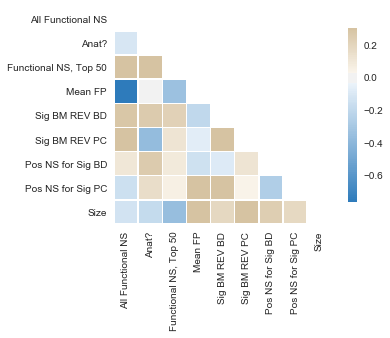

In [76]:
mask = np.zeros_like(simple_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(246, 53, s=88, l=50, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(simple_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
f.savefig('corrmat-simple.png', dpi=300)

In [166]:
bm_v_ns = pd.read_csv(join(data_dir, 'stats', 'rev-ns-bm-analog-sign-oldvnew.csv'), header=0, sep='\t')

bm_v_ns["version-bm"] = bm_v_ns["version"] + bm_v_ns["term"]

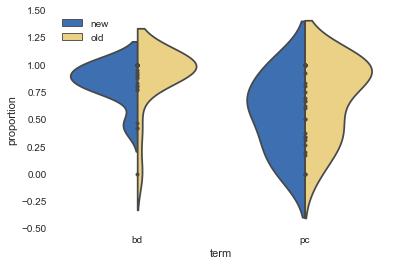

In [169]:
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)
ax = sns.violinplot(x="term", y="proportion", hue="version", data=bm_v_ns, palette=fiu, split=True, inner="point")
ax.legend(loc="upper left")
f.savefig(join(data_dir, 'presentations', 'new_v_old_ns_v_bm.png'), dpi=300)

In [ ]:
not_in_old_ns = ["amnestic", "biomarker", "biomarkers", "confidence", "consumption", "cortex dmpfc", 
                 "declines", "disability", "disorder ocd", "genes", "gm volume", "heart rate", 
                 "hub", "hubs", "impulsive", "individual variability", "medial pfc", "memory test", 
                 "monetary incentive", "motor function", "negative emotions", "negative feedback", 
                 "occipitotemporal", "occipitotemporal cortex", "olfactory", "posttraumatic", 
                 "reinforcement learning", "risk taking", "rsfc", "self report", "sensorimotor network", 
                 "sizes", "sn", "sustained attention", "symbolic", "td", "tegmental", "ventral tegmental", 
                 "visuo spatial", "watching", "ocd"]

In [ ]:
new_ns = ["abilities", "abstract", "abuse", "acc", "accumbens", "accurate", "accurately", "acoustic", "act", "action",
          "action observation", "actions", "acts", "ad", "adaptation", "add", "addiction", "adhd", "adolescence", 
          "adolescent", "adolescents", "adulthood", "adults", "affect", "affective", "age", "agent", "aging", "al",
          "alcohol", "alff", "alpha", "alzheimer", "alzheimer disease", "ambiguous",  "amygdala",
          "amygdala anterior", "amygdala hippocampus", "amygdala insula", "amygdala response", "amygdala responses",
          "anger", "angry", "angular", "angular gyrus", "animal", "animals", "anterior", "anterior cingulate", "anterior hippocampus", "anterior insula", "anterior insular", "anterior intraparietal", "anterior medial", "anterior posterior", "anterior prefrontal", "anterior superior", "anterior temporal", "anticipation", "anticipatory", "anxiety", "anxiety disorders", "aphasia", "appraisal", "arithmetic", "arm", "arousal", "arterial", "arterial spin", "articulatory", "asd", "associations", "associative", "asymmetry", "atrophy", "attend", "attended", "attending", "attention", "attention deficit", "attention network", "attention task", "attentional", "attentional control", "attenuation", "audiovisual", "auditory", "auditory cortex", "auditory stimuli", "auditory visual", "autism", "autism spectrum", "autobiographical", "autobiographical memory", "autonomic", "aversive", "avoid", "avoidance", "awareness", "ba", "ba 44", "balance", "basal", "basal ganglia", "baseline", "behavior", "behavioral", "behavioral measures", "behavioral responses", "behaviors", "belief", "beliefs", "beta", "bilinguals", "binding", "bipolar", "bipolar disorder", "blind", "bodily", "body", "brains", "brainstem", "broca", "brodmann", "button", "calculation", "callosum", "capacity", "capture", "categorical", "categories", "categorization", "category", "caudal", "caudate", "caudate nucleus", "cerebellar", "cerebellum", "cerebral", "cerebral cortex", "character", "characters", "children", "chinese", "choice", "choices", "choose", "chosen", "chronic", "chronic pain", "cingulate", "cingulate cortex", "cingulate cortices", "cingulate gyrus", "classical", "cognition", "cognitive", "cognitive control", "cognitive deficits", "cognitive emotional", "cognitive function", "cognitive functions", "cognitive impairment", "cognitive performance", "cognitive processes", "cognitive task", "cognitive tasks", "cognitively", "color", "communication", "compensate", "compensation", "compensatory", "competing", "competition", "complex", "complexity", "comprehension", "compulsive", "compulsive disorder", "computation", "concentration", "concept", "concepts", "conceptual", "concrete", "concurrent", "concurrently", "conditioned", "conditioning", "conductance", "conflict", "conflicting", "congruency", "congruent", "congruent incongruent", "conjunction", "connectivity", "conscious", "consciousness", "consecutive", "consistency", "consolidation", "constraints", "construction", "contexts", "contextual", "contralateral", "control", "control network", "control processes", "control task", "controlled", "controlling", "controls", "coordination", "core", "corpus", "corpus callosum", "correct", "correction", "correctly", "cortex acc", "cortex amygdala", "cortex anterior", "cortex ba", "cortex bilaterally", "cortex cerebellum", "cortex dacc", "cortex dlpfc", "cortex dorsal", "cortex dorsolateral", "cortex frontal", "cortex hippocampus", "cortex inferior", "cortex insula", "cortex involved", "cortex lateral", "cortex m1", "cortex medial", "cortex middle", "cortex mpfc", "cortex ofc", "cortex parietal", "cortex pcc", "cortex pfc", "cortex posterior", "cortex ppc", "cortex precuneus", "cortex suggest", "cortex superior", "cortex supplementary", "cortex thalamus", "cortex ventral", "cortex vlpfc", "cortex vmpfc", "cortical", "cortices", "cortico", "covert", "craving", "cross modal", "cue", "cued", "cues", "cuneus", "dacc", "damage", "decision", "decision making", "decision task", "decisions", "decline", "decoding", "default", "default mode", "default network", "deficient", "deficit", "deficit hyperactivity", "deficits", "delay", "demand", "demanding", "demands", "dementia", "depressed", "depression", "depressive", "depressive disorder", "deprivation", "depth", "detected", "detecting", "detection task", "developmental", "diagnosis", "difficult", "difficulty", "digit", "dimension", "dimensional", "dimensions", "discriminate", "discriminated", "discrimination", "discrimination task", "discriminative", "disease", "disease ad", "disease pd", "diseases", "disgust", "disorder", "disorder adhd", "disorder mdd", "disorder ptsd", "disorders", "distraction", "distractor", "distractors", "divided", "dlpfc", "dmn", "dmpfc", "domain general", "dominance", "dominant", "dopamine", "dopaminergic", "dorsal", "dorsal anterior", "dorsal attention", "dorsal medial", "dorsal premotor", "dorsal striatum", "dorsal ventral", "dorsolateral", "dorsolateral pfc", "dorsolateral prefrontal", "dorsomedial", "dorsomedial prefrontal", "drug", "drugs", "dyslexia", "dysregulation", "early visual", "eating", "economic", "education", "efficiency", "effort", "effortful", "elderly", "electrical", "emotion", "emotion regulation", "emotional", "emotional faces", "emotional information", "emotional responses", "emotional stimuli", "emotional valence", "emotionally", "emotions", "empathic", "empathy", "encode", "encoded", "encoding", "encoding retrieval", "endogenous", "engagement", "english", "epilepsy", "episode", "episodes", "episodic", "episodic memory", "erp", "error", "errors", "evaluation", "evaluations", "events", "everyday", "everyday life", "executed", "execution", "executive", "executive control", "executive function", "executive functions", "expectancy", "expectation", "expectations", "experience", "experiences", "experiencing", "expertise", "explicit", "exploration", "exploratory", "expressed", "expression", "expressions", "externally", "extinction", "extrastriate", "eye", "eye field", "eye fields", "eye movement", "eye movements", "eyes", "fa", "face", "face ffa", "face recognition", "faces", "facial", "facial expression", "facial expressions", "familiar", "familiarity", "family", "fasciculus", "fc", "fear", "fearful", "fearful faces", "features", "feeling", "feelings", "female", "females", "ffa", "fiber", "finger", "finger movements", "finger tapping", "fixation", "flexibility", "fluency", "food", "foot", "force", "form", "forms", "frequency", "frontal", "frontal cortex", "frontal cortices", "frontal eye", "frontal gyri", "frontal gyrus", "frontal lobe", "frontal lobes", "frontal operculum", "frontal parietal", "frontal temporal", "fronto", "fronto parietal", "fronto striatal", "fronto temporal", "frontoparietal", "frontoparietal network", "frontopolar", "frontotemporal", "functional connectivity", "fusiform", "fusiform face", "fusiform gyri", "fusiform gyrus", "gain", "gains", "gambling", "game", "gamma", "ganglia", "gaze", "generation", "german", "gestures", "globus", "globus pallidus", "gm", "goal", "goal directed", "goals", "grasping", "gyri", "gyrus", "gyrus anterior", "gyrus ba", "gyrus cerebellum", "gyrus ifg", "gyrus inferior", "gyrus insula", "gyrus medial", "gyrus mfg", "gyrus middle", "gyrus posterior", "gyrus precuneus", "gyrus stg", "gyrus superior", "hand", "hand movements", "handed", "handedness", "hands", "happy", "happy faces", "hc", "head", "health", "heard", "hearing", "heart", "hemisphere", "hemispheres", "hemispheric", "heschl", "heschl gyrus", "high risk", "hippocampal", "hippocampus", "hoc", "human", "humans", "hyperactivation", "hyperactivity", "hyperactivity disorder", "hypoactivation", "hypothalamus", "identification", "ifg", "illness", "illusion", "image", "imagery", "images", "imagine", "imagined", "imitation", "implicit", "impulsivity", "incentive", "incentive delay", "incongruent", "inconsistent", "incorrect", "index finger", "induction", "inference", "inferences", "inferior", "inferior frontal", "inferior middle", "inferior occipital", "inferior parietal", "inferior prefrontal", "inferior superior", "inferior temporal", "information", "inhibit", "inhibition", "inhibitory", "inhibitory control", "injury", "instruction", "instructions", "insula", "insula anterior", "insula inferior", "insular", "insular cortex", "integrate", "integrated", "integrating", "integration", "integrative", "integrity", "intelligence", "intense", "intensity", "intention", "intentional", "intentions", "interactions", "interactive", "interference", "interhemispheric", "interoceptive", "interpersonal", "interval", "intervals", "intraparietal", "intraparietal sulcus", "invasive", "ipl", "ips", "ipsilateral", "iq", "item", "items", "judgment", "judgment task", "judgments", "junction", "junction tpj", "knowledge", "language", "language comprehension", "language network", "languages", "lateral", "lateral frontal", "lateral medial", "lateral occipital", "lateral orbitofrontal", "lateral parietal", "lateral prefrontal", "lateral temporal", "lateralization", "lateralized", "learn", "learned", "learning", "learning task", "lesion", "lesions", "letter", "letters", "lexical", "lexical decision", "light", "likelihood", "limb", "limbic", "lingual", "lingual gyrus", "linguistic", "listened", "listening", "load", "lobe", "lobe mtl", "lobes", "lobule", "lobule ipl", "lobules", "location", "locations", "locus", "long term", "loop", "loss", "losses", "low level", "m1", "magnetic stimulation", "magnetoencephalography", "maintenance", "major depression", "major depressive", "manipulation", "manipulations", "manual", "mapping", "maps", "match", "matching", "matching task", "mci", "mdd", "medial", "medial frontal", "medial lateral", "medial orbitofrontal", "medial prefrontal", "medial superior", "medial temporal", "memories", "memory", "memory encoding", "memory load", "memory performance", "memory processes", "memory retrieval", "memory task", "memory tasks", "memory wm", "mental imagery", "mental state", "mental states", "mentalizing", "mesial", "mesolimbic", "met", "metabolic", "metabolism", "mfg", "mg", "midbrain", "middle cingulate", "middle frontal", "middle inferior", "middle occipital", "middle superior", "middle temporal", "midline", "mild cognitive", "mind", "mind tom", "mirror", "mm", "mnemonic", "modalities", "modality", "modulatory", "monetary", "monetary reward", "money", "monitoring", "mood", "moral", "morphological", "morphology", "motion", "motivation", "motivational", "motor", "motor control", "motor cortex", "motor imagery", "motor network", "motor performance", "motor pre", "motor premotor", "motor response", "motor responses", "motor sma", "motor task", "movement", "movements", "mpfc", "ms", "mt", "mtg", "mtl", "multiple sclerosis", "multisensory", "muscle", "music", "musical", "musicians", "names", "naming", "natural", "naturalistic", "navigation", "negative", "negative affect", "negative emotional", "negative neutral", "negative positive", "negativity", "neocortical", "network dmn", "neutral", "neutral faces", "neutral pictures", "neutral stimuli", "nociceptive", "nogo", "noise", "nouns", "novelty", "noxious", "nuclei", "nucleus", "nucleus accumbens", "object", "object recognition", "objects", "obsessive", "obsessive compulsive", "occipital", "occipital cortex", "occipital gyrus", "occipital lobe", "occipital parietal", "occipital temporal", "occipito", "occipito temporal", "oddball", "ofc", "older adults", "opercular", "opercularis", "operculum", "oral", "orbital", "orbitofrontal", "orbitofrontal cortex", "organization", "orientation", "oriented", "orienting", "orthographic", "oscillations", "outcome", "outcomes", "pain", "painful", "pair", "paired", "pairs", "pallidus", "parahippocampal", "parahippocampal cortex", "parahippocampal gyrus", "parahippocampus", "paralimbic", "parietal", "parietal cortex", "parietal cortices", "parietal frontal", "parietal junction", "parietal lobe", "parietal lobes", "parietal lobule", "parietal lobules", "parietal network", "parietal occipital", "parietal temporal", "parieto", "parieto occipital", "parkinson", "parkinson disease", "pars", "passive", "passive viewing", "passively", "pcc", "pd", "people", "perceiving", "percept", "perception", "perceptual", "performance", "performance task", "periaqueductal", "person", "personal", "personality", "personality traits", "persons", "pfc", "pharmacological", "phonological", "photographs", "picture", "pictures", "pitch", "place", "placebo", "placebo controlled", "planning", "planum", "planum temporale", "plasticity", "pleasant", "pointing", "pole", "poor", "positive negative", "postcentral", "postcentral gyrus", "posterior", "posterior anterior", "posterior cingulate", "posterior inferior", "posterior insula", "posterior middle", "posterior parietal", "posterior superior", "posterior temporal", "ppc", "pre sma", "pre supplementary", "precentral gyrus", "precuneus", "precuneus posterior", "prediction", "prediction error", "predictions", "predictive", "preference", "preferences", "prefrontal", "prefrontal cortex", "prefrontal cortical", "prefrontal cortices", "prefrontal parietal", "premotor", "premotor cortex", "preparation", "preparatory", "pressure", "primary", "primary auditory", "primary motor", "primary secondary", "primary sensorimotor", "primary somatosensory", "primary visual", "prime", "priming", "probabilistic", "probability", "production", "progressive", "prospective", "pseudowords", "psts", "psychotic", "ptsd", "punishment", "putamen", "questionnaire", "rating", "ratings", "reaching", "reaction", "reaction time", "reaction times", "reactions", "reactivity", "read", "readers", "reading", "real world", "reappraisal", "reasoning", "recall", "recognition", "recognition memory", "recognition task", "recognize", "recognized", "recognizing", "recollection", "reference", "referential", "referred", "regulate", "regulating", "regulation", "regulatory", "rehabilitation", "rehearsal", "reho", "reinforcement", "relational", "remember", "remembered", "remembering", "reorganization", "repetition", "repetition suppression", "response inhibition", "response selection", "response time", "response times", "rest", "resting", "resting state", "retention", "retrieval", "retrieved", "retrosplenial", "retrosplenial cortex", "reversal", "reward", "reward anticipation", "rewarding", "rewards", "rhythm", "risk", "risky", "rostral", "rostral anterior", "rotation", "rs", "rt", "rule", "rules", "s1", "saccade", "saccades", "sad", "salience", "salience network", "salient", "schizophrenic", "sclerosis", "secondary somatosensory", "selection", "selective", "selective attention", "self referential", "self reported", "semantic", "semantic memory", "semantically", "semantics", "sensation", "sensations", "sensitivity", "sensorimotor", "sensorimotor cortex", "sensory", "sensory information", "sensory motor", "sentence", "sentence comprehension", "sentences", "separation", "sequence", "sequences", "sequential", "serial", "serotonin", "sex", "sexual", "sham", "shapes", "shifting", "shifts", "short term", "si", "sighted", "signal task", "signaling", "sii", "silent", "similarity", "simulation", "size", "skin", "skin conductance", "sleep", "smokers", "smoking", "social", "social cognition", "social cognitive", "social interaction", "social interactions", "socially", "solving", "somatosensory", "somatosensory cortex", "somatosensory cortices", "sound", "sounds", "source", "sources", "space", "spatial", "spatial attention", "spatial information", "spatial temporal", "spatially", "spatiotemporal", "speaker", "speakers", "speaking", "spectrum", "spectrum disorder", "spectrum disorders", "speech", "speech perception", "speech production", "spl", "spoken", "spontaneous", "stimulation", "stimulation tms", "stop", "stop signal", "storage", "strategic", "strategies", "strategy", "stream", "streams", "stress", "stress disorder", "striatal", "striatum", "stroke", "stroop", "stroop task", "sts", "subcortical", "subcortical structures", "subgenual", "subjective", "subsequent", "subsequent memory", "substance", "substantia", "subtraction", "success", "suffering", "sulci", "sulcus", "sulcus ips", "sulcus sts", "superior", "superior inferior", "superior middle", "superior parietal", "superior temporal", "supplementary", "supplementary motor", "suppressed", "suppression", "supramarginal", "supramarginal gyrus", "sustained", "switch", "switching", "symptom", "symptom severity", "syntactic", "tactile", "tapping", "target", "target detection", "targets", "task", "task demands", "task difficulty", "task positive", "task relevant", "tasks", "taste", "temporal", "temporal cortex", "temporal cortices", "temporal frontal", "temporal gyri", "temporal gyrus", "temporal inferior", "temporal lobe", "temporal lobes", "temporal occipital", "temporal parietal", "temporal pole", "temporal sulcus", "temporale", "temporo", "temporo parietal", "temporoparietal", "temporoparietal junction", "thalamic", "thalamus", "theory", "theory mind", "therapy", "thinking", "thought", "thoughts", "threatening", "time task", "timing", "tom", "tone", "tools", "touch", "tpj", "track", "tracking", "trait", "traits", "uncertain", "uncertainty", "unexpected", "unfamiliar", "unilateral", "unimodal", "unpleasant", "updating", "v1", "v5", "valence", "value", "values", "ventral", "ventral anterior", "ventral dorsal", "ventral medial", "ventral premotor", "ventral striatum", "ventral visual", "ventrolateral", "ventrolateral prefrontal", "ventromedial", "ventromedial prefrontal", "verb", "verbal", "verbal fluency", "verbal working", "verbs", "vermis", "vi", "video", "video clips", "videos", "viewing", "violations", "virtual", "vision", "visual", "visual attention", "visual auditory", "visual cortex", "visual cortices", "visual field", "visual information", "visual motion", "visual perception", "visual stimuli", "visual stimulus", "visual stream", "visual word", "visually", "visually presented", "visuo", "visuomotor", "visuospatial", "vlpfc", "vmpfc", "vocal", "voice", "wm", "wm task", "word", "word form", "word pairs", "word recognition", "words", "working", "working memory", "written"]